# <u> HR-Employee-Attrition Classification Modeling <u>

#### Loading Modules 

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt

!pip install catboost
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
import warnings
from catboost import cv
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

from mlxtend.classifier import StackingClassifier
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

#### Importing Dataset

In [43]:
file = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
pd.set_option('display.max_columns', None)

## <u> Exploratory Data Analysis (EDA) <u>

In [44]:
file.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [45]:
file.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [46]:
file.shape

(1470, 35)

In [47]:
file.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [48]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [49]:
file.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [50]:
file.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [51]:
file.select_dtypes(object).describe().transpose()

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


# Data Cleaning

##### Making "Gender" and "Attrition" Binary

In [52]:
file['Attrition'] = file['Attrition'].map(lambda x: 1 if x == 'Yes' else 0)
file['Attrition'] = file['Attrition'].astype(int)


In [53]:
file['Gender'] = file['Gender'].map(lambda x: 1 if x == 'Male' else 0)
file['Gender'] = file['Gender'].astype(int)

In [54]:
file.select_dtypes(object).describe().transpose()

,count,unique,top,freq
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


#### Encoding the dataset to remove Objects

In [55]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
file["EducationField_code"] = ord_enc.fit_transform(file[["EducationField"]])
file[["EducationField", "EducationField_code"]].head(11)

file["Department_code"] = ord_enc.fit_transform(file[["Department"]])
file[["Department", "Department_code"]].head(11)

file["JobRole_code"] = ord_enc.fit_transform(file[["JobRole"]])
file[["JobRole", "JobRole_code"]].head(11)

file["MaritalStatus_code"] = ord_enc.fit_transform(file[["MaritalStatus"]])
file[["MaritalStatus", "MaritalStatus_code"]].head(11)

file["OverTime_code"] = ord_enc.fit_transform(file[["OverTime"]])
file[["OverTime", "OverTime_code"]].head(11)

file["BusinessTravel_code"] = ord_enc.fit_transform(file[["BusinessTravel"]])
file[["BusinessTravel", "BusinessTravel_code"]].head(11)

,BusinessTravel,BusinessTravel_code
0,Travel_Rarely,2.0
1,Travel_Frequently,1.0
2,Travel_Rarely,2.0
3,Travel_Frequently,1.0
4,Travel_Rarely,2.0
5,Travel_Frequently,1.0
6,Travel_Rarely,2.0
7,Travel_Rarely,2.0
8,Travel_Frequently,1.0
9,Travel_Rarely,2.0


In [56]:
display(file)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationField_code,Department_code,JobRole_code,MaritalStatus_code,OverTime_code,BusinessTravel_code
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1.0,2.0,7.0,2.0,1.0,2.0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,1.0,1.0,6.0,1.0,0.0,1.0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,4.0,1.0,2.0,2.0,1.0,2.0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,1.0,1.0,6.0,1.0,1.0,1.0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,3.0,1.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,3.0,1.0,2.0,1.0,0.0,1.0
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,3.0,1.0,0.0,1.0,0.0,2.0
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,1.0,1.0,4.0,1.0,1.0,2.0
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,3.0,2.0,7.0,1.0,0.0,1.0


#### Removing the obsolete columns 

In [57]:
file.drop('Over18', axis = 1, inplace = True)
file.drop('EmployeeCount', axis = 1, inplace = True)
file.drop('StandardHours', axis = 1, inplace = True)
file.drop('EmployeeNumber', axis = 1, inplace = True)
file.drop('OverTime', axis = 1, inplace = True)
file.drop('BusinessTravel', axis = 1, inplace = True)
file.drop('MaritalStatus', axis = 1, inplace = True)
file.drop('JobRole', axis = 1, inplace = True)
file.drop('EducationField', axis = 1, inplace = True)
file.drop('Department', axis = 1, inplace = True)

In [58]:
file.dtypes

Age                           int64
Attrition                     int32
DailyRate                     int64
DistanceFromHome              int64
Education                     int64
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobSatisfaction               int64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
EducationField_code         float64
Department_code             float64
JobRole_code                

#### Converting the new binary columns into int

In [59]:
file['EducationField_code'].astype(int)
file['JobRole_code'].astype(int)
file['MaritalStatus_code'].astype(int)
file['OverTime_code'].astype(int)
file['BusinessTravel_code'].astype(int)

0       2
1       1
2       2
3       1
4       2
       ..
1465    1
1466    2
1467    2
1468    1
1469    2
Name: BusinessTravel_code, Length: 1470, dtype: int32

In [60]:
file= file.astype('int')

In [61]:
file.dtypes

Age                         int32
Attrition                   int32
DailyRate                   int32
DistanceFromHome            int32
Education                   int32
EnvironmentSatisfaction     int32
Gender                      int32
HourlyRate                  int32
JobInvolvement              int32
JobLevel                    int32
JobSatisfaction             int32
MonthlyIncome               int32
MonthlyRate                 int32
NumCompaniesWorked          int32
PercentSalaryHike           int32
PerformanceRating           int32
RelationshipSatisfaction    int32
StockOptionLevel            int32
TotalWorkingYears           int32
TrainingTimesLastYear       int32
WorkLifeBalance             int32
YearsAtCompany              int32
YearsInCurrentRole          int32
YearsSinceLastPromotion     int32
YearsWithCurrManager        int32
EducationField_code         int32
Department_code             int32
JobRole_code                int32
MaritalStatus_code          int32
OverTime_code 

In [62]:
display(file)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationField_code,Department_code,JobRole_code,MaritalStatus_code,OverTime_code,BusinessTravel_code
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,2,7,2,1,2
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,1,6,1,0,1
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,4,1,2,2,1,2
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,1,6,1,1,1
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,3,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,3,1,2,1,0,1
1466,39,0,613,6,1,4,1,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,3,1,0,1,0,2
1467,27,0,155,4,3,2,1,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,1,1,4,1,1,2
1468,49,0,1023,2,3,4,1,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,3,2,7,1,0,1


C:\Users\61425\AppData\Local\Temp/ipykernel_8348/2307422146.py:3: UserWarning: DelftStack
  warnings.warn('DelftStack')
C:\Users\61425\AppData\Local\Temp/ipykernel_8348/2307422146.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(2,


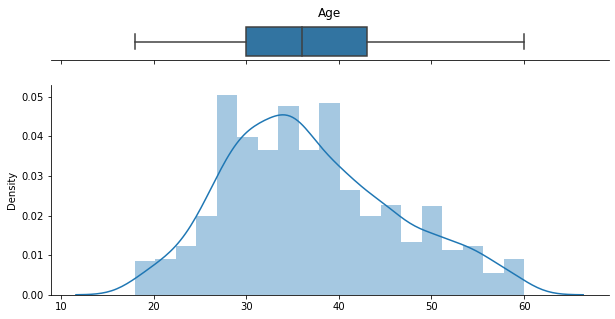

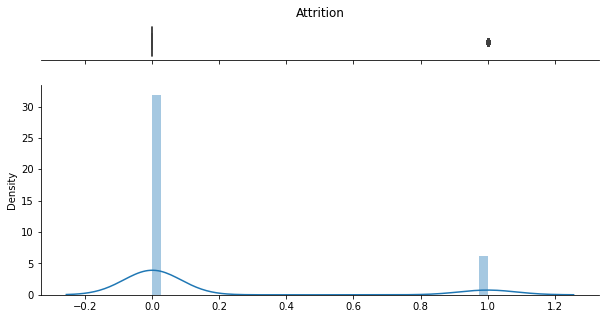

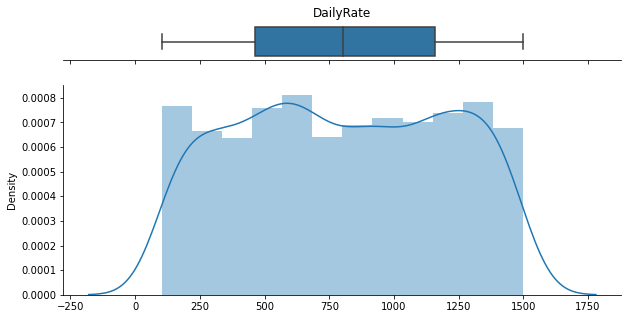

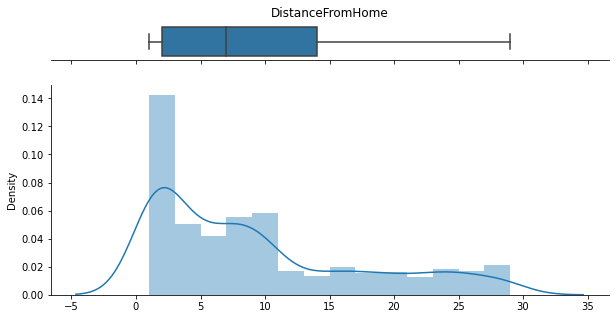

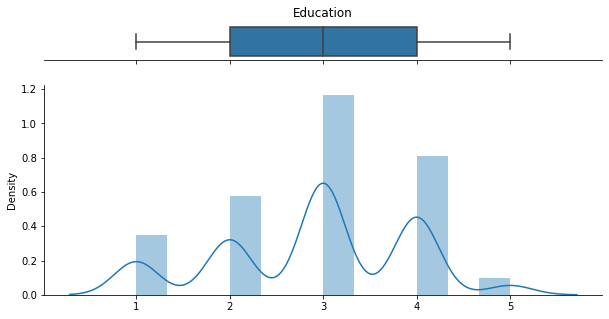

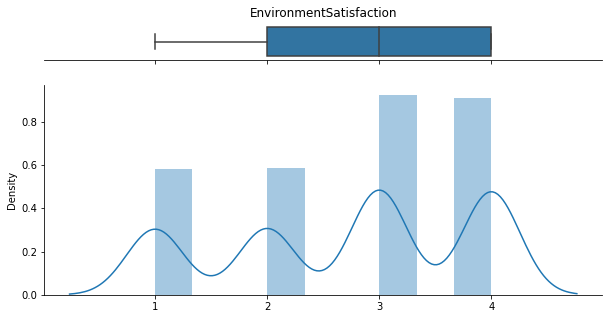

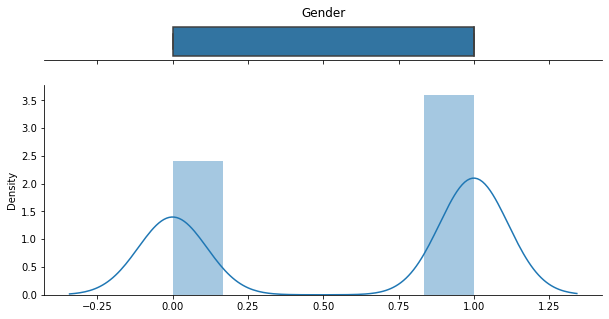

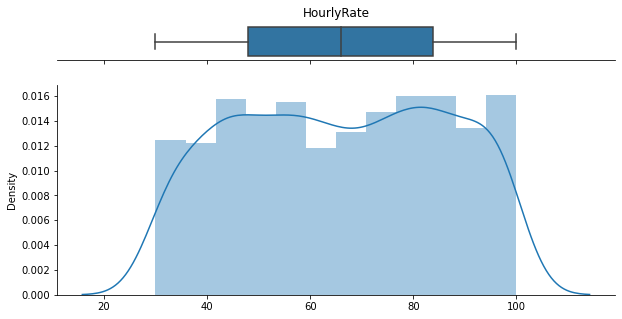

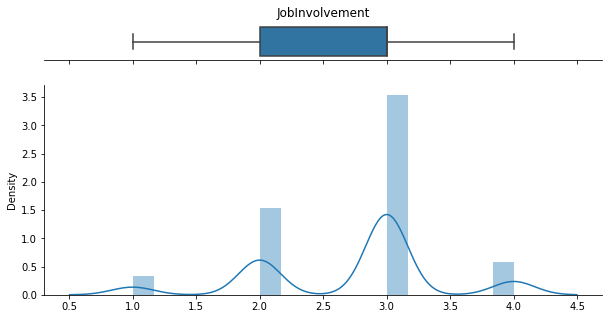

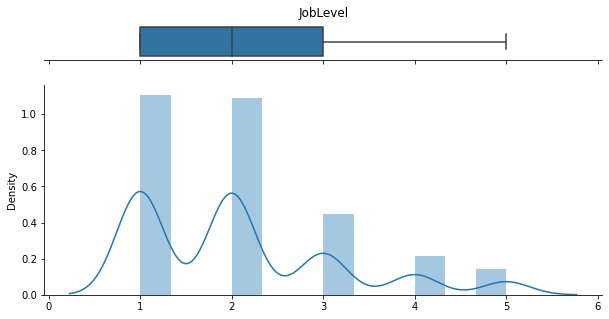

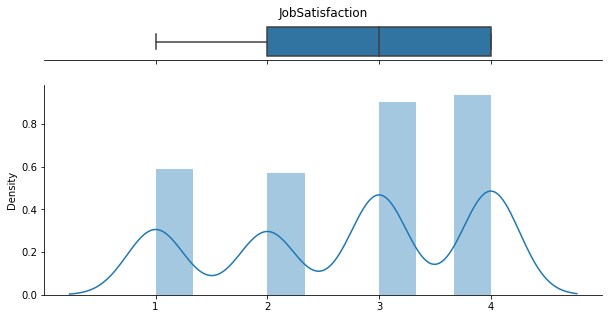

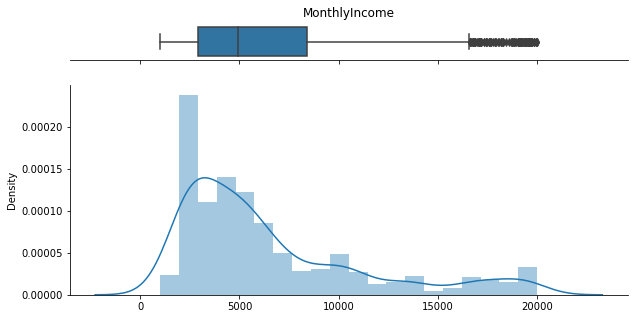

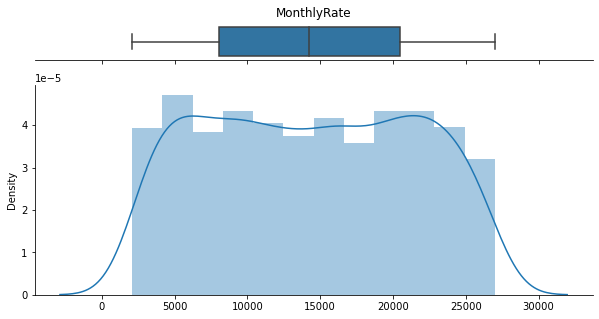

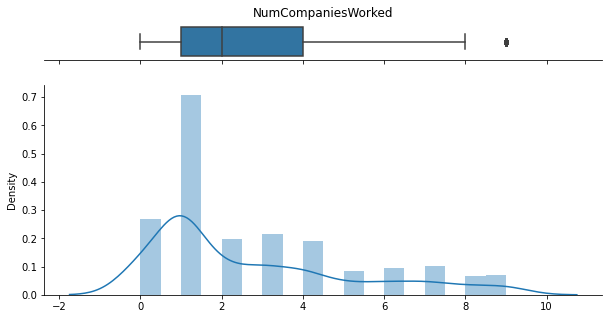

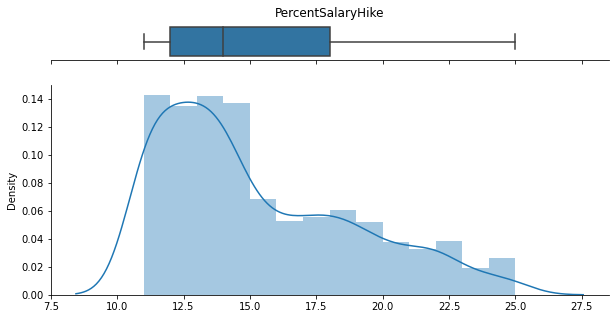

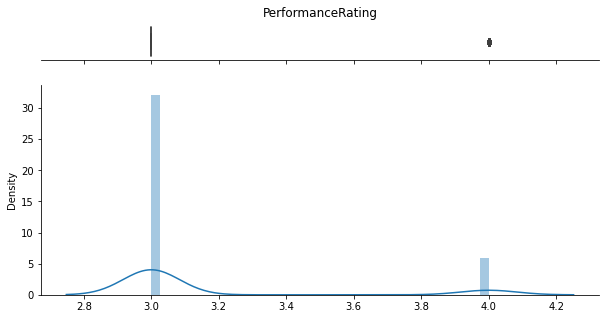

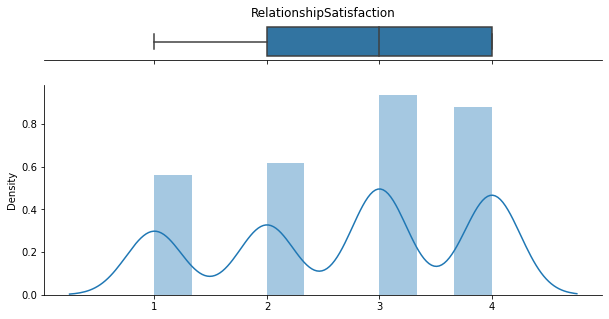

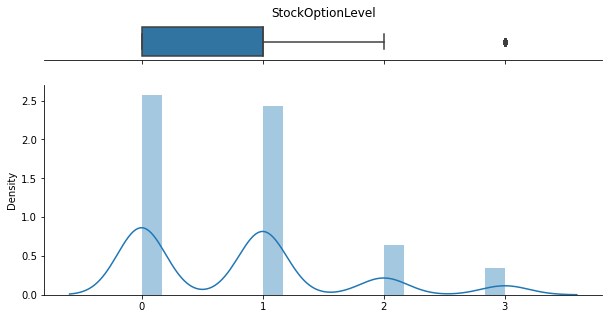

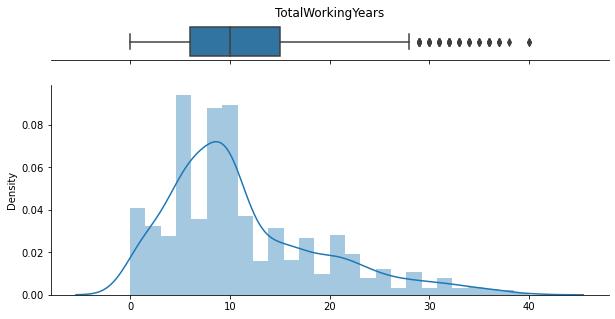

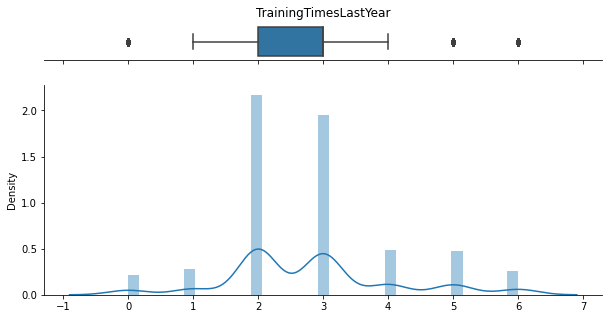

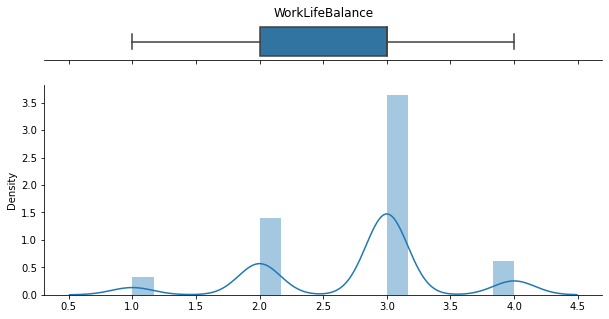

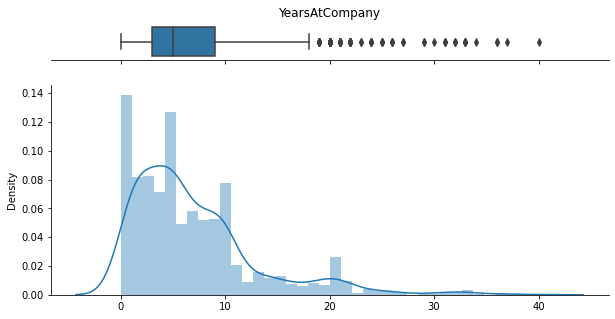

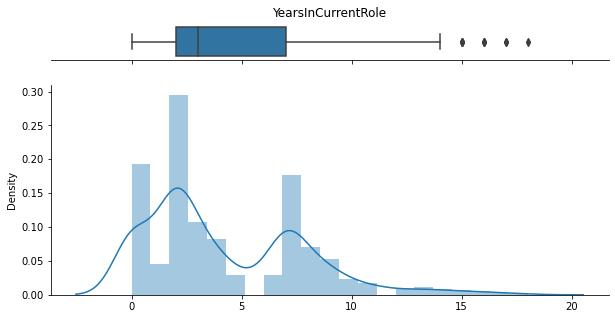

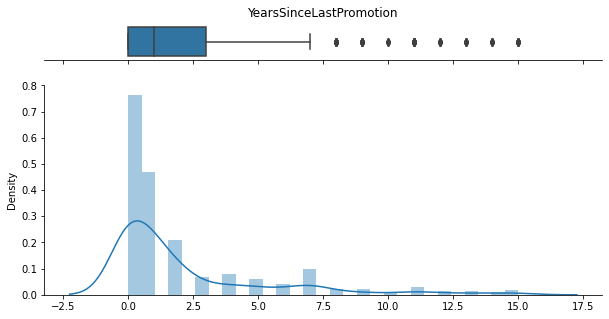

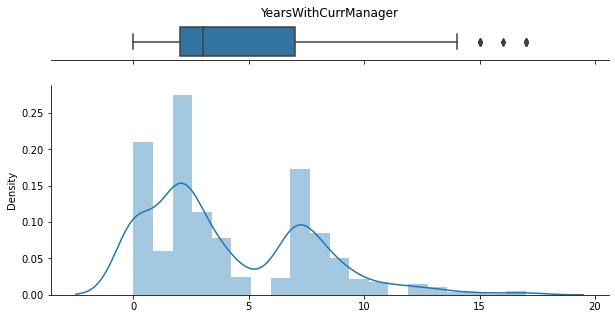

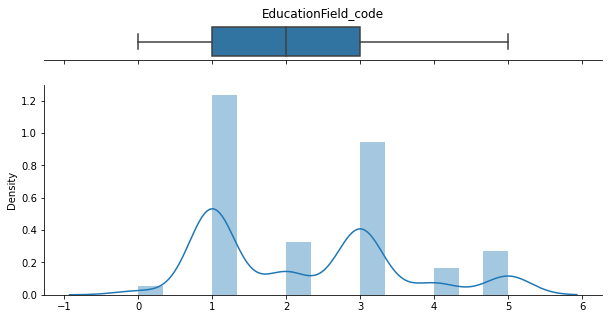

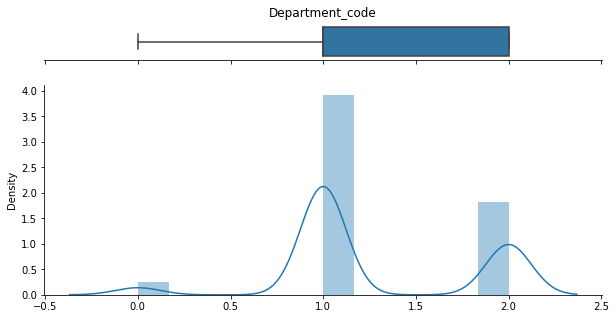

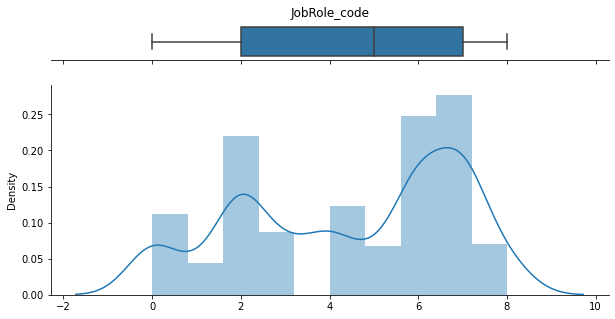

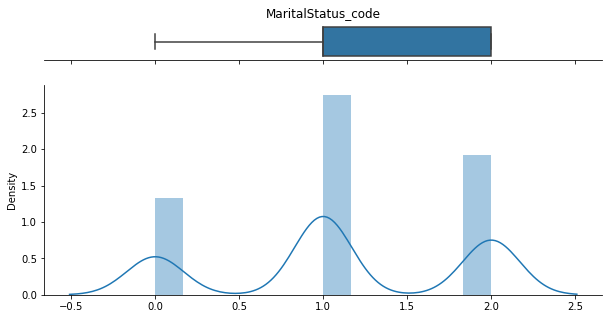

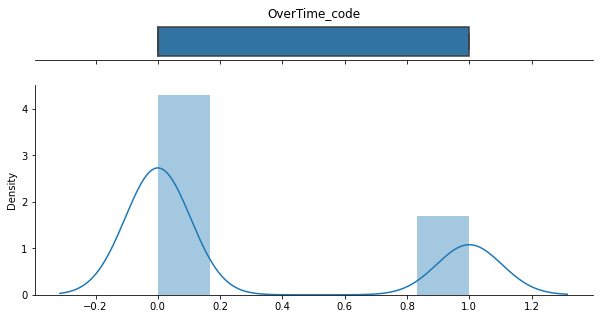

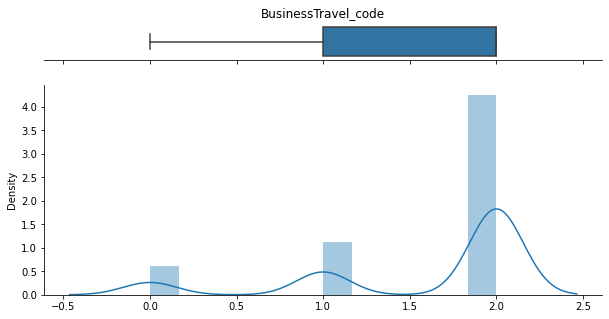

In [63]:
# Check for Outliers
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
for c in file.columns:
    fig, ax = plt.subplots(2, 
                           figsize = (10, 5),
                           sharex = True, 
                           gridspec_kw = {'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(file[c], ax = ax_box)
    ax_box.set(title = c, yticks = [], xlabel = '')
    sns.despine(ax = ax_box, left = True)
    
    ax_hist = ax[1]
    
    if c == 'Donated_Mar_2007':       
        ax_hist = sns.distplot(file[c], kde=False, ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
    else:
        ax_hist = sns.distplot(file[c], ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
        

plt.show()

# <u> Graphical EDA <u> 

## Attrition By Age

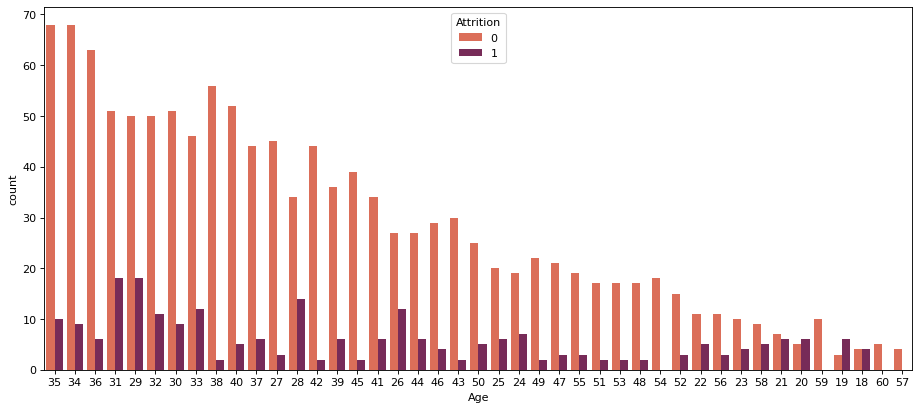

In [23]:
plt.figure(figsize=(14,6), dpi=80)
sns.countplot(data=file, x='Age', hue='Attrition', order = file['Age'].value_counts().index, palette='rocket_r').set_title
('Attrition by Age');

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>],
       [<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'center':'StockOp

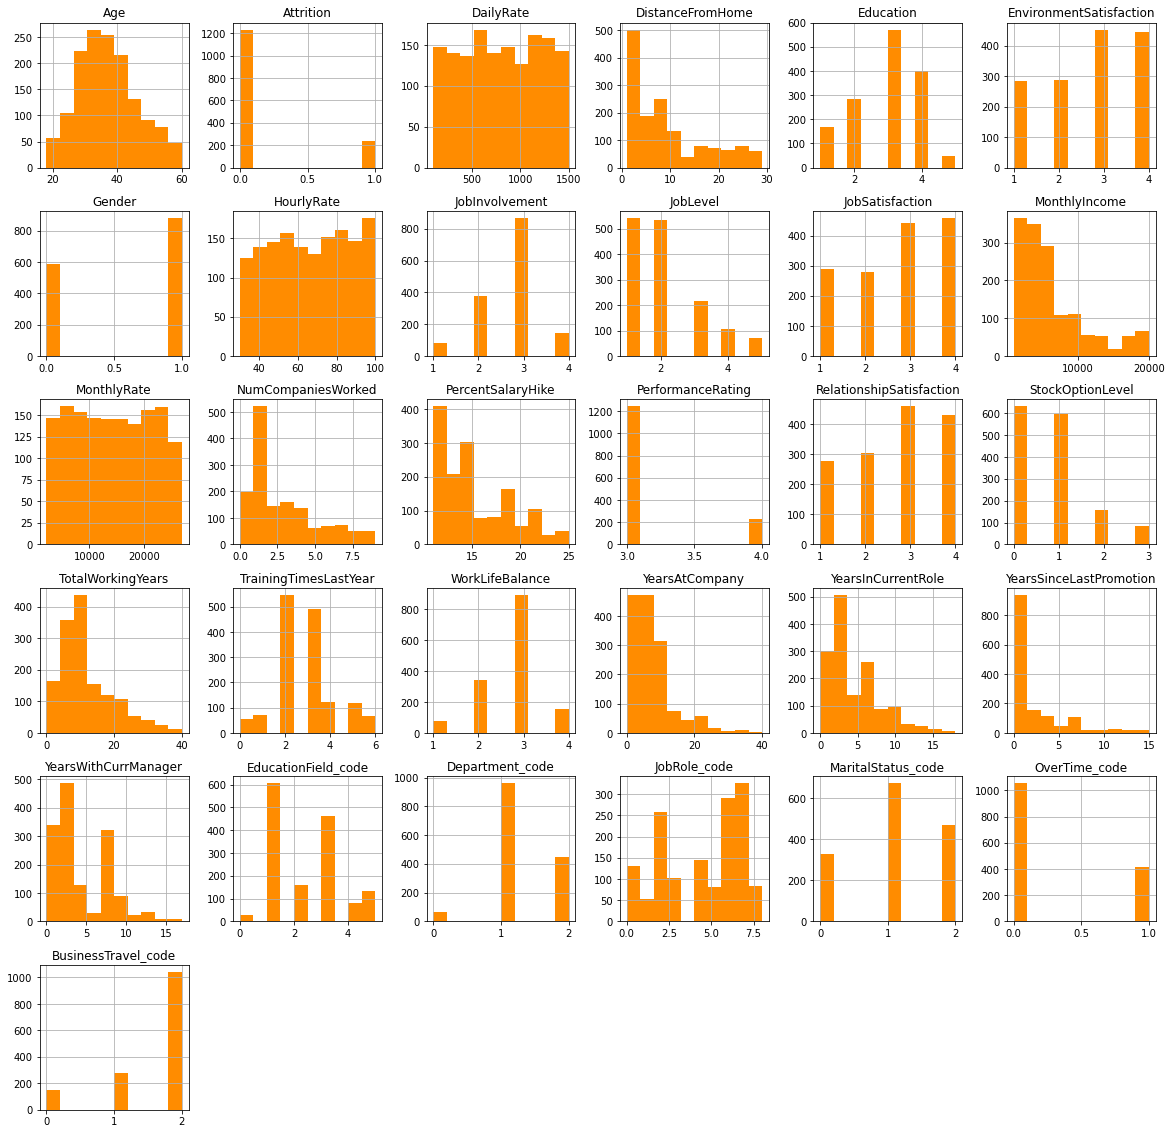

In [24]:
file.hist(figsize=(20,20), color = 'darkorange')

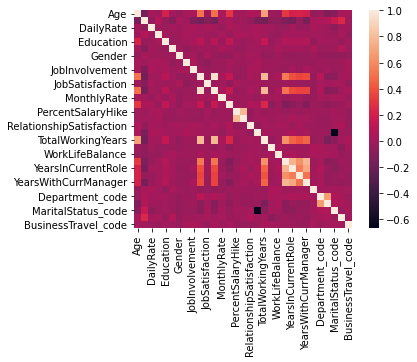

In [25]:
ax = sns.heatmap(file.corr(),square=True, cmap="rocket")

In [26]:
file.corr()["Attrition"].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
BusinessTravel_code         0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField_code         0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department_code             0.063991
JobRole_code                0.067151
D

# CatBoost Clasifier 

In [64]:
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_score(actual, prediction))
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_score(actual, prediction))
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_score(actual, prediction))
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_score(actual, probabilities[:, 1]))
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'rocket_r', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'darkorange', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'black', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

## Model 1

In [65]:
X= file.drop('Attrition', axis=1).values
y = file['Attrition']

cat_features = list(range(0, X.shape[1]))
from catboost import Pool
train_pool = Pool(data=X, label=y, cat_features=cat_features, has_header=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=46 ) 

model = CatBoostClassifier(iterations=2,
                          learning_rate=1,
                          depth=2)

model.fit(X_train, y_train,verbose=False, cat_features=cat_features )

print('CatBoost model is fitted: ' + str(model.is_fitted()))
print('CatBoost model parameters:')
print(model.get_params())


y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 2, 'learning_rate': 1, 'depth': 2}


#### Training Results

Accuracy : 0.8581 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7778 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0897 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7457                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


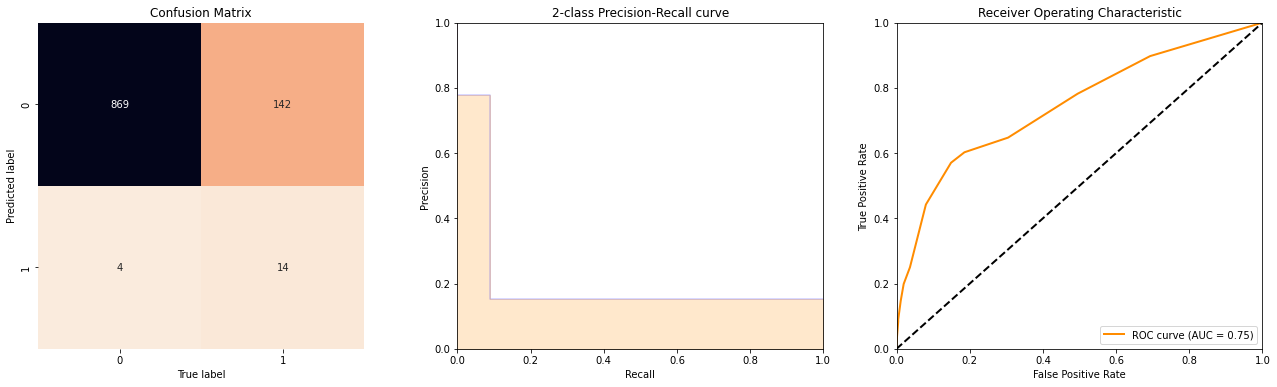

In [66]:
show_summary_report(y_train, y_train_pred, y_train_prob)

#### Test Results

In [67]:
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)

M1P= precision_score(y_test, y_test_pred, pos_label=1)
M1A= accuracy_score(y_test, y_test_pred)
M1S = recall_score(y_test, y_test_pred, pos_label=1)

print("Accuracy = ", M1A)
print("Precision =", M1P)
print("Recall/ Sensitivity =", M1S)

Accuracy =  0.8253968253968254
Precision = 0.7
Recall/ Sensitivity = 0.08641975308641975


Accuracy : 0.8254 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0864 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7755                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


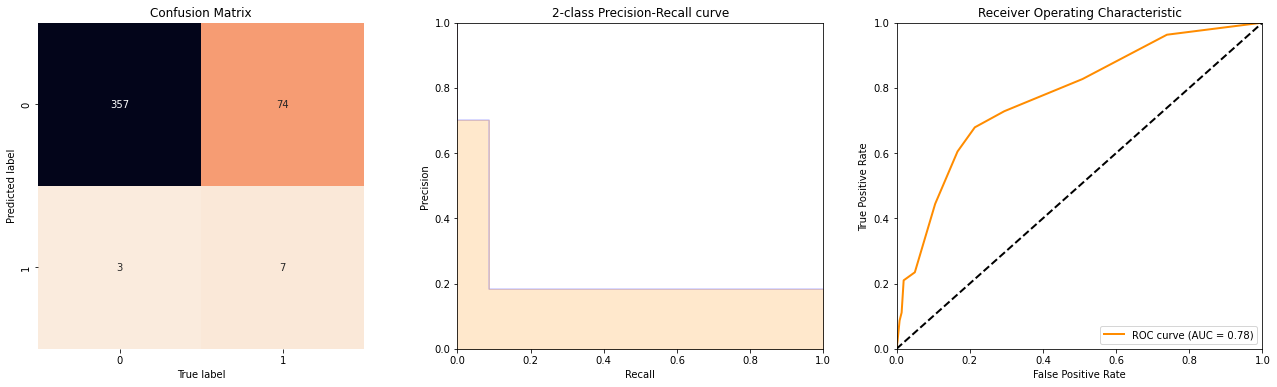

In [68]:
show_summary_report(y_test, y_test_pred, y_test_prob)

## Model1 Cross Validation

In [69]:
params = {
    'loss_function': 'Logloss',
    'iterations': 2,
    'custom_loss': 'AUC',
    'learning_rate': 1,
    'depth': 2}


In [70]:
def print_cv_summary(cv_data):
    cv_data.head(10)

    best_value = cv_data['test-Logloss-mean'].min()
    best_iter = cv_data['test-Logloss-mean'].values.argmin()

    print('Best validation Logloss score : {:.4f}±{:.4f} on step {}'.format(
        best_value,
        cv_data['test-Logloss-std'][best_iter],
        best_iter))

In [71]:
cv_data = cv(
    params = params,
    pool = train_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=46,
    plot=True,
    stratified=True,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.3883037149
bestIteration = 1

Training on fold [1/5]

bestTest = 0.3984242392
bestIteration = 1

Training on fold [2/5]

bestTest = 0.4123129331
bestIteration = 1

Training on fold [3/5]

bestTest = 0.3716305629
bestIteration = 1

Training on fold [4/5]

bestTest = 0.3900955413
bestIteration = 1



In [35]:
print_cv_summary(cv_data)
from sklearn.metrics import make_scorer

Best validation Logloss score : 0.3922±0.0149 on step 1


In [36]:
scoring = {'accuracy':'accuracy', 'precision':'precision', 'recall': 'recall', 'roc_auc': 'roc_auc'}
CV = cross_validate(model, X, y, cv=5,scoring = scoring)
sorted(CV.keys())

0:	learn: 0.4167444	total: 885us	remaining: 885us
1:	learn: 0.3885249	total: 1.46ms	remaining: 0us
0:	learn: 0.4182830	total: 534us	remaining: 534us
1:	learn: 0.3808124	total: 1.17ms	remaining: 0us
0:	learn: 0.4173289	total: 574us	remaining: 574us
1:	learn: 0.3789158	total: 1.11ms	remaining: 0us
0:	learn: 0.3861629	total: 595us	remaining: 595us
1:	learn: 0.3601529	total: 1.2ms	remaining: 0us
0:	learn: 0.4181521	total: 629us	remaining: 629us
1:	learn: 0.3833307	total: 1.26ms	remaining: 0us


C:\Users\61425\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['fit_time',
 'score_time',
 'test_accuracy',
 'test_precision',
 'test_recall',
 'test_roc_auc']

# GridSearch

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=46 )
parameters = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }
CBC = CatBoostClassifier()
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 5, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

0:	learn: 0.6636522	total: 32.6ms	remaining: 3.22s
1:	learn: 0.6325024	total: 34ms	remaining: 1.67s
2:	learn: 0.6069119	total: 35.3ms	remaining: 1.14s
3:	learn: 0.5812893	total: 36.5ms	remaining: 875ms
4:	learn: 0.5604360	total: 37.7ms	remaining: 717ms
5:	learn: 0.5445554	total: 38.9ms	remaining: 610ms
6:	learn: 0.5301808	total: 39.8ms	remaining: 529ms
7:	learn: 0.5166710	total: 41.1ms	remaining: 473ms
8:	learn: 0.4990693	total: 42.4ms	remaining: 429ms
9:	learn: 0.4827763	total: 43.8ms	remaining: 394ms
10:	learn: 0.4710324	total: 45ms	remaining: 364ms
11:	learn: 0.4591312	total: 46.2ms	remaining: 339ms
12:	learn: 0.4463274	total: 47.4ms	remaining: 317ms
13:	learn: 0.4367885	total: 48.7ms	remaining: 299ms
14:	learn: 0.4281973	total: 49.8ms	remaining: 282ms
15:	learn: 0.4183488	total: 51ms	remaining: 268ms
16:	learn: 0.4104804	total: 52.1ms	remaining: 254ms
17:	learn: 0.4034538	total: 53.2ms	remaining: 242ms
18:	learn: 0.3969269	total: 54.4ms	remaining: 232ms
19:	learn: 0.3898551	total: 

# Model2 (With Gridsearch best parameters)

In [72]:
X= file.drop('Attrition', axis=1).values
y = file['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=46 ) 

cat_features = list(range(0, X.shape[1]))

model2 = CatBoostClassifier(iterations=100,
                          learning_rate=0.04,
                          depth=6)


model2.fit(X_train, y_train, verbose=False, cat_features=cat_features)

print('CatBoost model is fitted: ' + str(model2.is_fitted()))
print('CatBoost model parameters:')
print(model2.get_params())

y_train_pred2 = model2.predict(X_train)
y_train_prob2 = model2.predict_proba(X_train)


CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 100, 'learning_rate': 0.04, 'depth': 6}


#### Training Results

Accuracy : 0.8785 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9697 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2051 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9117                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


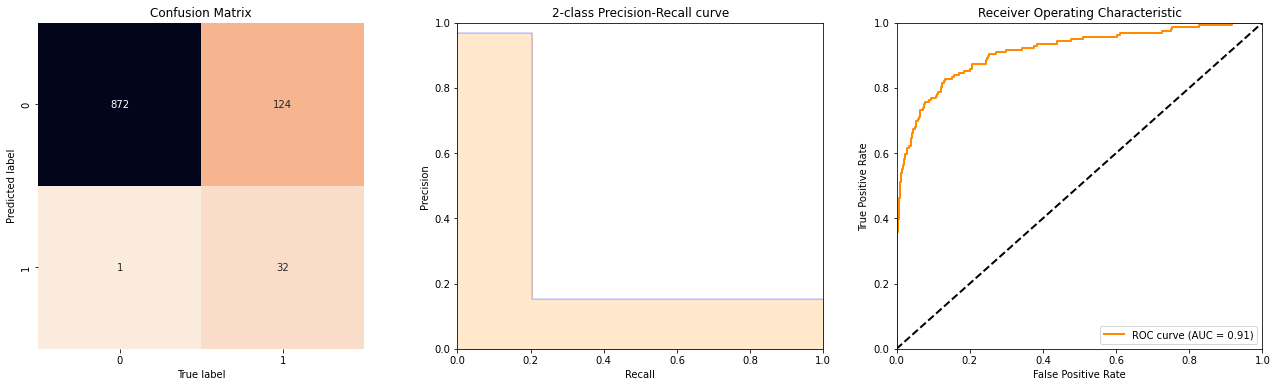

In [73]:
y_train_pred2 = model2.predict(X_train)
y_train_prob2 = model2.predict_proba(X_train)
show_summary_report(y_train, y_train_pred2, y_train_prob2)

#### Test Results

Accuracy =  0.8412698412698413
Precision = 0.9230769230769231
Recall/ Sensitivity = 0.14814814814814814
Accuracy : 0.8413 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9231 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.1481 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8154                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


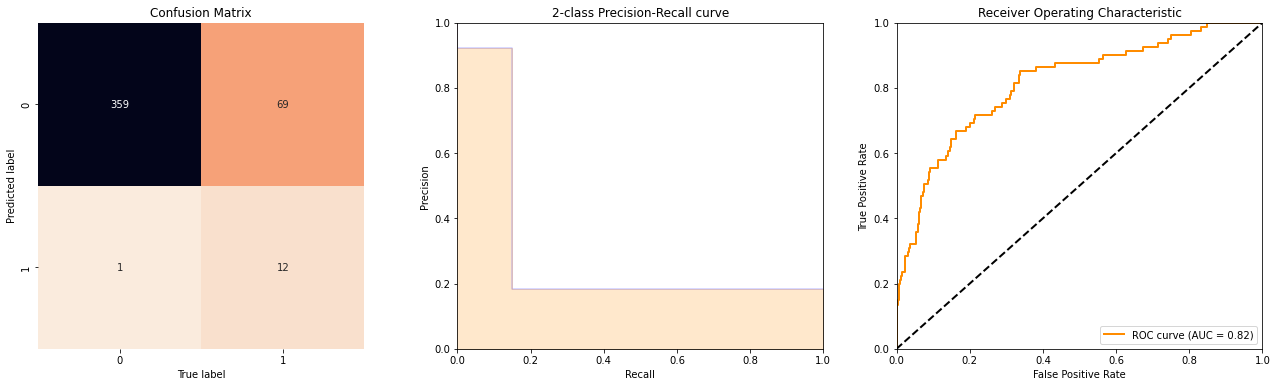

In [74]:

y_test_pred2 = model2.predict(X_test)
y_test_prob2 = model2.predict_proba(X_test)

M2P= precision_score(y_test, y_test_pred2, pos_label=1)
M2A= accuracy_score(y_test, y_test_pred2)
M2S = recall_score(y_test, y_test_pred2, pos_label=1)

print("Accuracy = ", M2A)
print("Precision =", M2P)
print("Recall/ Sensitivity =", M2S)


show_summary_report(y_test, y_test_pred2, y_test_prob2)

## Model2 Cross Validation

In [75]:
params = {
    'loss_function': 'Logloss',
    'iterations': 100,
    'custom_loss': 'AUC',
    'learning_rate': 0.04,
    'depth': 6}

In [76]:
cv_data2 = cv(
    params = params,
    pool = train_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=46,
    plot=True,
    stratified=True,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.3243720188
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3644560104
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3513141186
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3329498727
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3573781294
bestIteration = 95



In [77]:
print_cv_summary(cv_data2)

Best validation Logloss score : 0.3462±0.0169 on step 99


# Model3

In [78]:
X= file.drop('Attrition', axis=1).values
y = file['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

cat_features = list(range(0, X.shape[1]))

model3 = CatBoostClassifier(iterations=100,
                          learning_rate=0.04,
                          depth=8)


model3.fit(X_train, y_train, verbose=False, cat_features=cat_features)

print('CatBoost model is fitted: ' + str(model3.is_fitted()))
print('CatBoost model parameters:')
print(model3.get_params())

y_train_pred3 = model.predict(X_train)
y_train_prob3 = model.predict_proba(X_train)





CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 100, 'learning_rate': 0.04, 'depth': 8}


#### Training Results

Accuracy : 0.8426 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7727 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0977 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7434                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


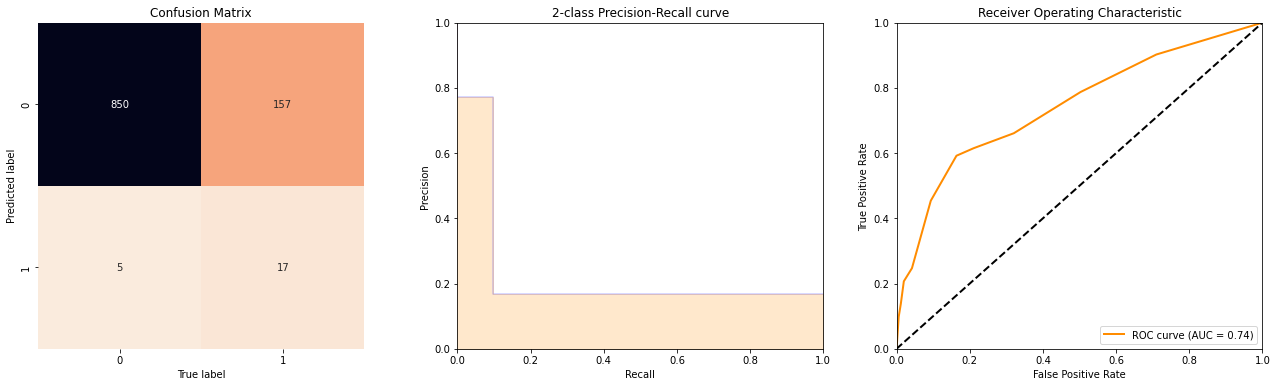

In [79]:
show_summary_report(y_train, y_train_pred3, y_train_prob3)

#### Test Results

Accuracy =  0.8707482993197279
Precision = 0.875
Recall/ Sensitivity = 0.1111111111111111
Accuracy : 0.8707 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8750 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.1111 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8247                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


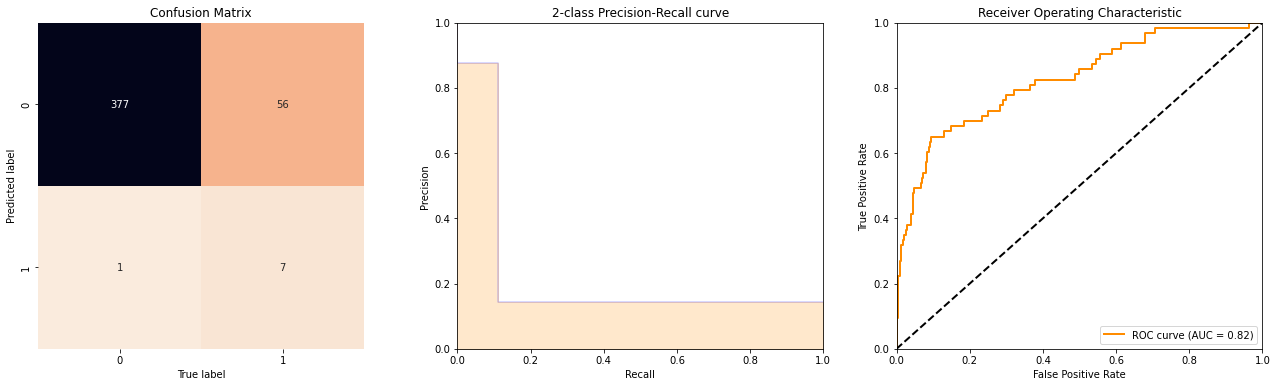

In [80]:
y_test_pred3 = model3.predict(X_test)
y_test_prob3 = model3.predict_proba(X_test)

M3P= precision_score(y_test, y_test_pred3, pos_label=1)
M3A= accuracy_score(y_test, y_test_pred3)
M3S = recall_score(y_test, y_test_pred3, pos_label=1)

print("Accuracy = ", M3A)
print("Precision =", M3P)
print("Recall/ Sensitivity =", M3S)
show_summary_report(y_test, y_test_pred3, y_test_prob3)

## Model3 Cross Validation

In [81]:
params = {
    'loss_function': 'Logloss',
    'iterations': 100,
    'custom_loss': 'AUC',
    'learning_rate': 0.04,
    'depth': 8}

In [82]:
cv_data3 = cv(
    params = params,
    pool = train_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=46,
    plot=True,
    stratified=True,
    verbose=False)

print_cv_summary(cv_data3)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.3142401428
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3606362717
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3551814523
bestIteration = 98

Training on fold [3/5]


KeyboardInterrupt: 

In [ ]:
print_cv_summary(cv_data3)

In [83]:
X= file.drop('Attrition', axis=1).values
y = file['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

# Decision Tree Classifier

In [ ]:
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)



#### Training Results

In [ ]:


y_train_pred4 = cart.predict(X_train)
y_train_prob4 = cart.predict_proba(X_train)


show_summary_report(y_train, y_train_pred4, y_train_prob4)

#### Test Results

In [ ]:
y_test_pred4 = cart.predict(X_test)
y_test_prob4 = cart.predict_proba(X_test)

DTCP= precision_score(y_test, y_test_pred4, pos_label=1)
DTCA= accuracy_score(y_test, y_test_pred4)
DTCR = recall_score(y_test, y_test_pred4, pos_label=1)

print("Accuracy = ", DTCP)
print("Precision =", DTCA)
print("Recall/ Sensitivity =", DTCR)

In [ ]:
show_summary_report(y_test, y_test_pred4, y_test_prob4)

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(cart, X, y, cv=5)
print(scores)

# KNeighborsClassifier

In [ ]:
X= file.drop('Attrition', axis=1).values
y = file['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

#### Training Results

Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


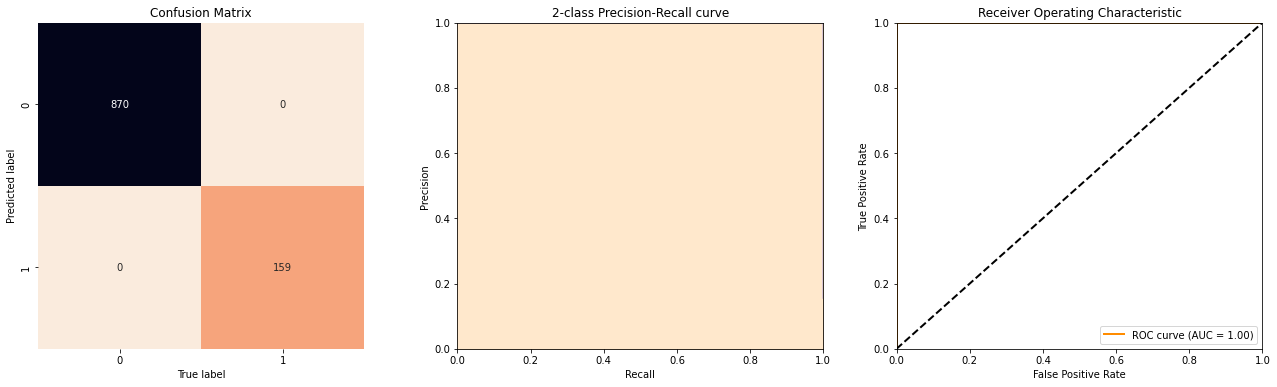

In [57]:
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(X_train, y_train)

y_train_pred7 = KNN.predict(X_train)
y_train_prob7 = KNN.predict_proba(X_train)


show_summary_report(y_train, y_train_pred7, y_train_prob7)

#### Test Results

Accuracy =  0.2835820895522388
Precision = 0.7573696145124716
Recall/ Sensitivity = 0.24358974358974358
Accuracy : 0.7574 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.2836 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2436 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5557                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


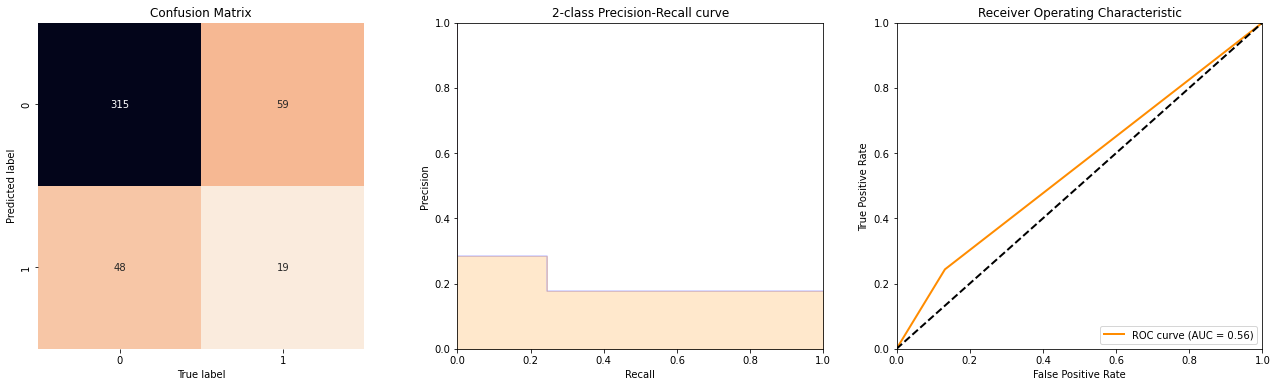

In [58]:
y_test_pred7 = KNN.predict(X_test)
y_test_prob7 = KNN.predict_proba(X_test)

KNNP= precision_score(y_test, y_test_pred7, pos_label=1)
KNNA= accuracy_score(y_test, y_test_pred7)
KNNR = recall_score(y_test, y_test_pred7, pos_label=1)

print("Accuracy = ", KNNP)
print("Precision =", KNNA)
print("Recall/ Sensitivity =", KNNR)

show_summary_report(y_test, y_test_pred7, y_test_prob7)

### Cross Validation

In [59]:
scores = cross_val_score(KNN, X, y, cv=5)
print(scores)

[0.78571429 0.76870748 0.75170068 0.7755102  0.7414966 ]


# AdaBoostClassifier

In [60]:
X= file.drop('Attrition', axis=1).values
y = file['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [61]:
num_trees = 100
Boost = AdaBoostClassifier(n_estimators = num_trees, random_state = 46)
Boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=46)

#### Training Results

Accuracy : 0.9184 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8679 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5679 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9612                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


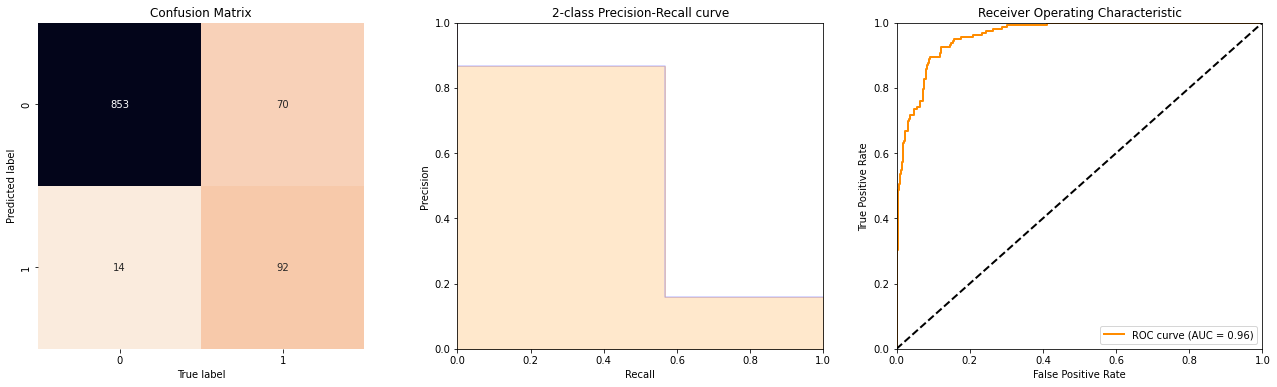

In [62]:
y_train_pred6 = Boost.predict(X_train)
y_train_prob6 = Boost.predict_proba(X_train)


show_summary_report(y_train, y_train_pred6, y_train_prob6)

#### Test Results

In [63]:
y_test_pred6 = Boost.predict(X_test)
y_test_prob6 = Boost.predict_proba(X_test)

ABOOSTP= precision_score(y_test, y_test_pred6, pos_label=1)
ABOOSTA= accuracy_score(y_test, y_test_pred6)
ABOOSTR = recall_score(y_test, y_test_pred6, pos_label=1)

print("Accuracy = ", ABOOSTP)
print("Precision =", ABOOSTA)
print("Recall/ Sensitivity =", ABOOSTR)

Accuracy =  0.5531914893617021
Precision = 0.8412698412698413
Recall/ Sensitivity = 0.3466666666666667


Accuracy : 0.8413 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5532 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.3467 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8062                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


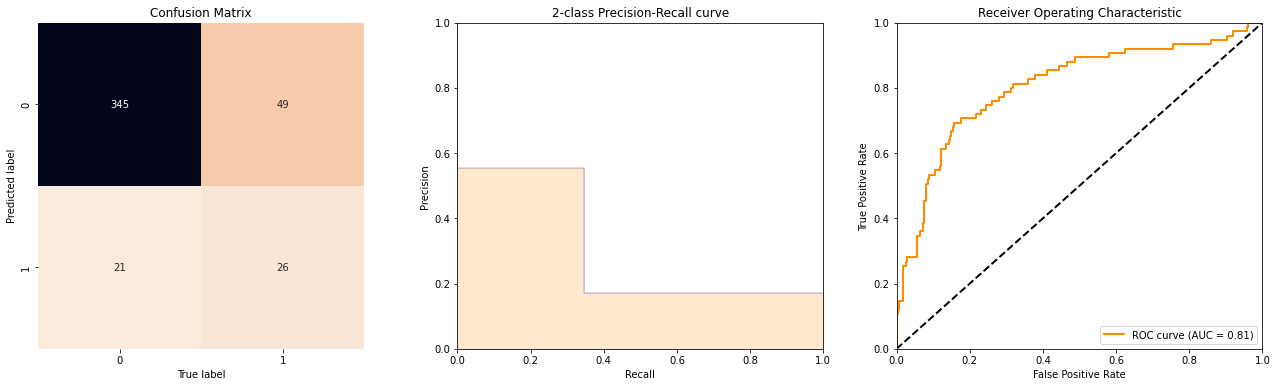

In [64]:
show_summary_report(y_test, y_test_pred6, y_test_prob6)

### Cross Validation

In [65]:
scores = cross_val_score(Boost, X, y, cv=5)
print(scores)

[0.8707483  0.87414966 0.85714286 0.8537415  0.91496599]


# BaggingClassifier

In [66]:
X= file.drop('Attrition', axis=1).values
y = file['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [67]:
num_trees = 1000
Bag = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = 46)
Bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  random_state=46)

#### Training Results

Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


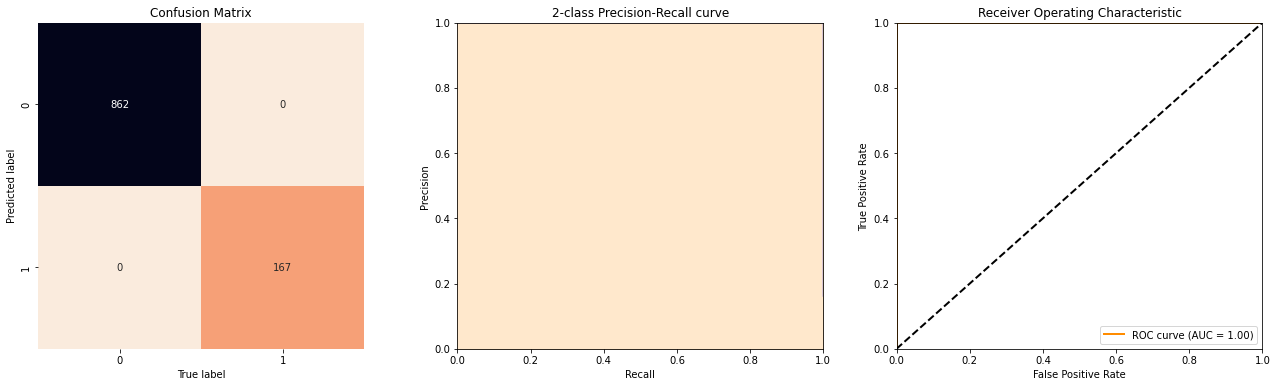

In [68]:
y_train_pred7 = Bag.predict(X_train)
y_train_prob7 = Bag.predict_proba(X_train)

show_summary_report(y_train, y_train_pred7, y_train_prob7)

#### Test Results

In [69]:
y_test_pred7 = Bag.predict(X_test)
y_test_prob7 = Bag.predict_proba(X_test)

BagP= precision_score(y_test, y_test_pred7, pos_label=1)
BagA= accuracy_score(y_test, y_test_pred7)
BagR = recall_score(y_test, y_test_pred7, pos_label=1)

print("Accuracy = ", BagA)
print("Precision =", BagP)
print("Recall/ Sensitivity =", BagR)

Accuracy =  0.8616780045351474
Precision = 0.6666666666666666
Recall/ Sensitivity = 0.2571428571428571


Accuracy : 0.8617 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6667 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2571 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8226                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


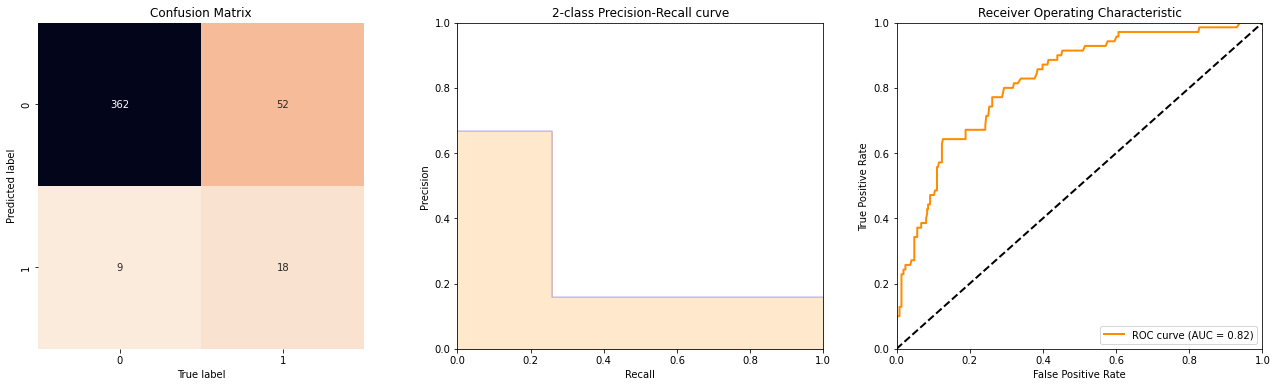

In [70]:
show_summary_report(y_test, y_test_pred7, y_test_prob7)

### Cross Validation

# GridSearch

In [78]:

bc_params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
}


bc_gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), bc_params, cv=5, verbose=1)
bc_gs.fit(X_train, y_train)


Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [3, 5, 10, 20],
                         'base_estimator__max_features': [None, 'auto'],
                         'base_estimator__min_samples_leaf': [1, 3, 5, 7, 10],
                         'base_estimator__min_samples_split': [2, 5, 7],
                         'bootstrap_features': [False, True],
                         'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [2, 5, 10, 20]},
             verbose=1)

In [79]:



print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",bc_gs.best_estimator_)
print("\n The best score across ALL searched params:\n",bc_gs.best_score_)
print("\n The best parameters across ALL searched params:\n",bc_gs.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.8697560975609756

 The best parameters across ALL searched params:
 {'depth': 6, 'iterations': 100, 'learning_rate': 0.04}
 Results from Grid Search 

 The best estimator across ALL searched params:
 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                        min_samples_leaf=3,
                                                        min_samples_split=7),
                  max_features=0.5, max_samples=0.5)

 The best score across ALL searched params:
 0.8600757755150367

 The best parameters across ALL searched params:
 {'base_estimator__max_depth': 20, 'base_estimator__max_features': None, 'base_estimator__min_samples_leaf': 3, 'base_estimator__min_samples_split': 7, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10}


# BaggingClassifier (With GrideSearch Results)

In [80]:
X= file.drop('Attrition', axis=1).values
y = file['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

num_trees = 100
Bag2 = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = 46, max_samples=0.5,max_features=0.5)
Bag2.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, n_estimators=100, random_state=46)

#### Training Results

Accuracy : 0.9640 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7836 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9998                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


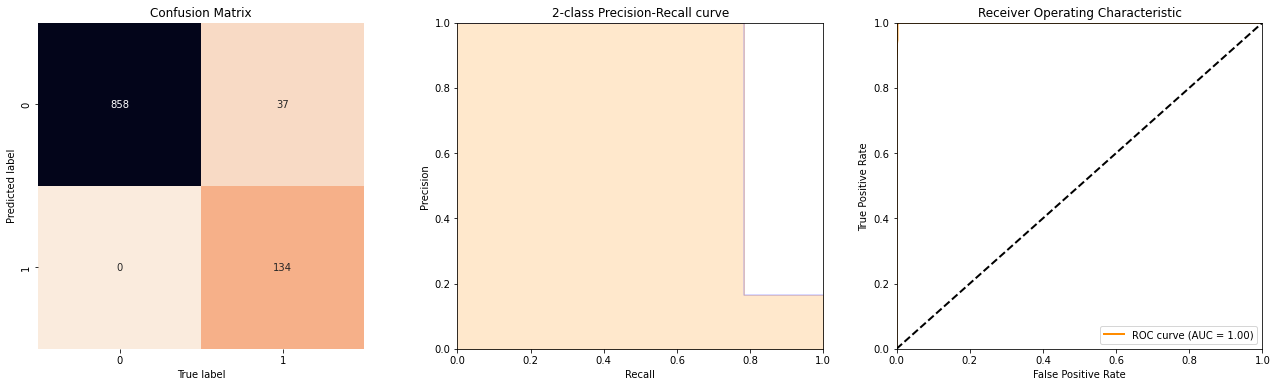

In [81]:
y_train_pred8 = Bag2.predict(X_train)
y_train_prob8 = Bag2.predict_proba(X_train)

show_summary_report(y_train, y_train_pred8, y_train_prob8)

#### Test Results


In [82]:
y_test_pred8 = Bag.predict(X_test)
y_test_prob8 = Bag.predict_proba(X_test)

Bag2P= precision_score(y_test, y_test_pred8, pos_label=1)
Bag2A= accuracy_score(y_test, y_test_pred8)
Bag2R = recall_score(y_test, y_test_pred8, pos_label=1)

print("Accuracy = ", Bag2A)
print("Precision =", Bag2P)
print("Recall/ Sensitivity =", Bag2R)

Accuracy =  0.963718820861678
Precision = 0.9629629629629629
Recall/ Sensitivity = 0.7878787878787878


Accuracy : 0.9637 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9630 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7879 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9630                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


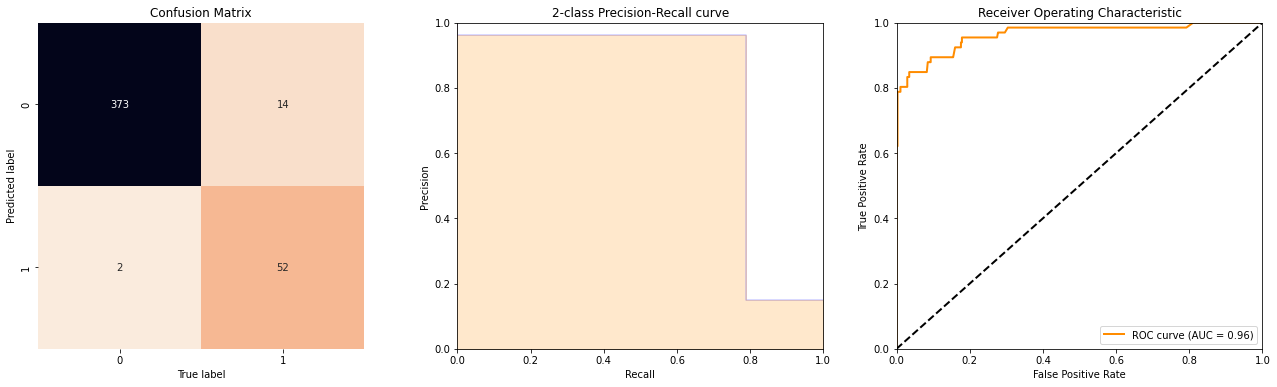

In [83]:
show_summary_report(y_test, y_test_pred8, y_test_prob8)

### Cross Validation

In [84]:
scores = cross_val_score(Bag2, X, y, cv=5)
print(scores)

[0.84353741 0.85714286 0.85714286 0.85714286 0.85034014]


# Summary Table

In [41]:
data= [{'Accuracy': M1A, 'Precision': M1S, 'Recall': M1P, 'ROC Score': 0.7755}, 
       {'Accuracy': M2A,'Precision': M2S, 'Recall': M2P, 'ROC Score': 0.8154},
       {'Accuracy': M3A,'Precision': M3S, 'Recall': M3P, 'ROC Score':0.8316},
      {'Accuracy': DTCA,'Precision': DTCP, 'Recall': DTCR, 'ROC Score':0.6131},
       {'Accuracy': KNNA,'Precision': KNNP, 'Recall': KNNR, 'ROC Score':0.5296},
      {'Accuracy': ABOOSTA,'Precision': ABOOSTP, 'Recall': ABOOSTR, 'ROC Score':0.8573},
      {'Accuracy': BagA,'Precision': BagP, 'Recall': BagR, 'ROC Score':0.8490},
      {'Accuracy': Bag2A,'Precision': Bag2P, 'Recall': Bag2R, 'ROC Score':0.7907}]
       


Assignment_Results= pd.DataFrame(data, index=['CatBoostM1', 'CatBoostM2', 'CatBosstM3', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'AdaBoostClassifier','BaggingClassifier','BaggingClassifier2'])

Assignment_Results

df.plt(kind='bar', stacked=True,)


NameError: name 'M2A' is not defined

## Results: Bagging Classifier 2 is the best 

In [38]:
!pip install wandb
import wandb

wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: clarissa (clarissa_capstone). Use `wandb login --relogin` to force relogin


True

In [39]:
wandb.sklearn.plot_summary_metrics(CatBoostM1, X_train, X_test, y_train, y_test)

NameError: name 'CatBoostM1' is not defined